<a href="https://colab.research.google.com/github/neisyo-korea/chobo-s-tear/blob/main/Problem2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline


from numpy.random import seed
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [ ]:
# load data 
sensor_data = pd.read_csv('/content/Problem2.csv', index_col=0)
new_header = sensor_data.iloc[0] #grab the first row for the header
sensor_data = sensor_data[1:] #take the data less the header row
sensor_data.columns = new_header #set the header row as the df header
sensor_data.head()

Time (min),X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52
0,0.240909994,3695.600098,4537.200195,9.399600029,27.04800034,42.50600052,2705.899902,75.48100281,120.4100037,0.353190005,...,53.5530014,23.95000076,63.5530014,22.88400078,42.25299835,40.47000122,48.43199921,47.92300034,41.34700012,20.02799988
1,0.240869999,3682.100098,4535.399902,9.280599594,26.82799911,42.27299881,2703.300049,74.92700195,120.4100037,0.354389995,...,53.57400131,23.95400047,62.49300003,22.35199928,42.10699844,36.21500015,50.71500015,48.17200089,41.02600098,18.55200005
2,0.190400004,3662.800049,4551.799805,9.286499977,26.92200089,42.40599823,2704.199951,74.54199982,120.4000015,0.33476001,...,54.83499908,18.5510006,62.61600113,22.40200043,38.99499893,39.04499817,46.78900146,48.31800079,40.93500137,20.13299942
3,0.188229993,3682,4548.5,9.303099632,27.13299942,42.34199905,2702.300049,75.06700134,120.4000015,0.333400011,...,54.87400055,18.76399994,63.35599899,22.25300026,39.1609993,38.07500076,44.07099915,48.38600159,41.04600143,18.5189991
4,0.239529997,3664.899902,4573.5,9.275300026,26.68199921,42.34600067,2703.800049,74.91699982,120.4199982,0.323799998,...,54.72999954,23.37000084,60.9620018,22.33300018,38.43399811,40.50999832,46.60300064,48.62799835,41.5530014,19.51600075


In [ ]:
using_model= tf.keras.models.load_model("bearing-sensor-anomaly-detection.h5")

In [ ]:
# scale 용 load data 
df = pd.read_csv('/content/train_data.csv', index_col=0)
header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = header #set the header row as the df header
df.head()


Time (min),X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52
0,0.248889998,3702.300049,4502.700195,9.416999817,26.99600029,42.18299866,2705.199951,75.17299652,120.4000015,0.336109996,...,54.05899811,24.80400085,63.26900101,21.95000076,40.18799973,39.46099854,47,47.59400177,41.38399887,18.90500069
1,0.249039993,3666.199951,4526,9.268199921,26.70999908,42.33200073,2705.5,74.41100311,120.4100037,0.336760014,...,53.78099823,24.79000092,62.17100143,22.23900032,40.10800171,43.70999908,46.12799835,47.50799942,41.65800095,18.97599983
2,0.250340015,3673.300049,4501.299805,9.421199799,26.84199905,42.36000061,2705.300049,75.125,120.4100037,0.337390006,...,54.07500076,24.66900063,61.58499908,22.19099998,40.02999878,39.47999954,44.12099838,47.61199951,41.72100067,16.56200027
3,0.25108999,3657.800049,4497.799805,9.379199982,26.52799988,41.98199844,2707.300049,73.99199677,120.3799973,0.33664,...,54.11700058,24.59499931,61.56100082,21.95899963,40.12099838,32.84799957,45.85800171,47.45899963,40.83599854,20.09399986
4,0.245629996,3698,4537.399902,9.37460041,26.73600006,42.35400009,2705.300049,75.28299713,120.4199982,0.325210005,...,53.90599823,24.45100021,61.38800049,22.27099991,39.5379982,36.68199921,45.75299835,47.45800018,41.72700119,18.32999992


In [ ]:
# normalize the data
scaler = MinMaxScaler()
X_df = scaler.fit_transform(df)
X_test = scaler.transform(sensor_data)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Test data shape: (1000, 1, 52)


In [ ]:
X_pred = using_model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=df.columns)
X_pred.index = df.index

scored = pd.DataFrame(index=df.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.2  # threshold 의 맥스값은 describe으로 찾아보니 0.19정도 인데 이거 코드 수정하면 될듯. 일단은 0.2로 해놈. 
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored[206]

,Loss_mae,Threshold,Anomaly
0,0.122331,0.2,False
1,0.112867,0.2,False
2,0.102030,0.2,False
3,0.111152,0.2,False
4,0.112368,0.2,False
...,...,...,...
995,0.299470,0.2,True
996,0.282079,0.2,True
997,0.305981,0.2,True
998,0.301958,0.2,True


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

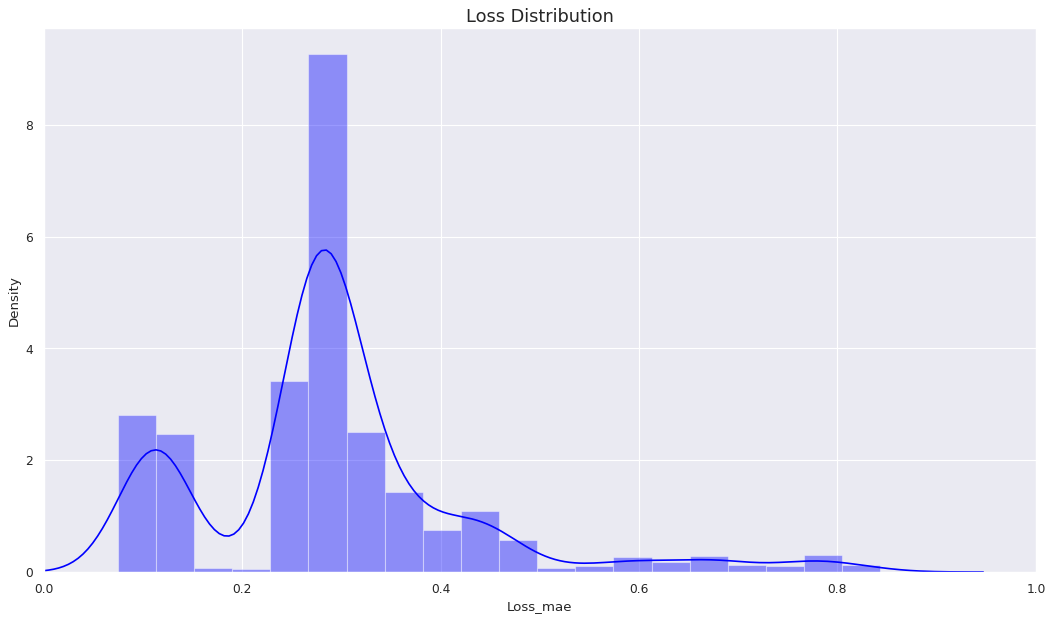

In [ ]:
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,1])

In [ ]:
#206번 부터 고장. X1, X44, X18, X19 유력